In [1]:
import pandas as pd 
from collections import Counter 
from sklearn.impute import SimpleImputer
import numpy as np 


dataset = pd.read_csv("weatherHistory.csv")
dataset = dataset.drop(["Formatted Date"], axis=1)

# dataset.info() Precip Type, Summary, Daily Summary 
counter = Counter(dataset.Summary)
counts = dict(counter) 

summary_cats = ["Partly Cloudy", "Mostly Cloudy", "Overcast", "Foggy"]
def clean_summary(summary: str) -> str:
    if summary not in summary_cats: 
        return "Others"
    else: return summary 
    
dataset["Summary"] = dataset.Summary.apply(clean_summary)
dataset = pd.get_dummies(dataset, columns=["Summary"])
dataset = dataset.drop(["Summary_Others"], axis=1)
dataset["Daily Summary"]

#Cleaning Daily Summary 
counter = Counter(dataset["Daily Summary"])
daily_summaries = dict(counter) 
dsummary_cats = ["Mostly cloudy throughout the day.", "Partly cloudy throughout the day.", "Partly cloudy until night.", "Partly cloudy starting in the morning.", "Foggy in the morning."]
def clean_daily_summary(dsummary: str) -> str: 
    if dsummary not in dsummary_cats: return "Others"
    else: return dsummary
    
dataset["Daily Summary"] = dataset["Daily Summary"].apply(clean_daily_summary)
dataset = pd.get_dummies(dataset, columns=["Daily Summary"])
dataset = dataset.drop(["Daily Summary_Others"], axis=1)


In [2]:
#Cleaning Preicp type 

imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
dataset["Precip Type"] = imputer.fit_transform(dataset["Precip Type"].values.reshape(-1, 1))
dataset = pd.get_dummies(dataset, columns=["Precip Type"])
dataset = dataset.drop(["Precip Type_snow"], axis=1)

In [3]:
#dataset is ready 
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Temperature (C)                                       96453 non-null  float64
 1   Apparent Temperature (C)                              96453 non-null  float64
 2   Humidity                                              96453 non-null  float64
 3   Wind Speed (km/h)                                     96453 non-null  float64
 4   Wind Bearing (degrees)                                96453 non-null  float64
 5   Visibility (km)                                       96453 non-null  float64
 6   Loud Cover                                            96453 non-null  float64
 7   Pressure (millibars)                                  96453 non-null  float64
 8   Summary_Foggy                                         96

In [4]:
#Creating training and testing sets 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = dataset.drop(["Temperature (C)"], axis=1) , dataset["Temperature (C)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf = LinearRegression(n_jobs=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
dataset 

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Daily Summary_Foggy in the morning.,Daily Summary_Mostly cloudy throughout the day.,Daily Summary_Partly cloudy starting in the morning.,Daily Summary_Partly cloudy throughout the day.,Daily Summary_Partly cloudy until night.,Precip Type_rain
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0,0,0,1,0,0,0,1,0,1
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0,0,0,1,0,0,0,1,0,1
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0,1,0,0,0,0,0,1,0,1
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0,0,0,1,0,0,0,1,0,1
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,0,0,0,1,0,0,1,0,0,1
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,0,0,0,1,0,0,1,0,0,1
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,0,0,0,1,0,0,1,0,0,1
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,0,0,0,1,0,0,1,0,0,1


<AxesSubplot:>

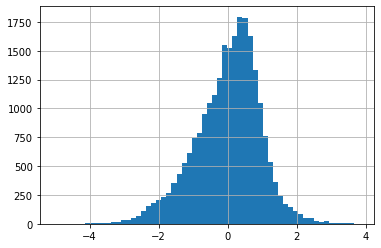

In [19]:
from Regression import Regression
reg = Regression(dataset, "Temperature (C)")
table = reg.construct_error_table()
table = pd.DataFrame(table)
table.residue.hist(bins=60)